In [ ]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize


In [ ]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

maxi=0

In [ ]:
import pandas as pd
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the dataset
df = pd.read_csv('/content/advanced+statistical_feature.csv')

# Split the dataset into train and test sets
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.7
train = df[msk]
test = df[~msk]

# Prepare the features and target variable
x = train.drop("Level", axis=1)
y = train["Level"]

# Convert class labels to start from 0
y = y - 1

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1)

# Define a list of classifiers
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    gaussian_process.GaussianProcessClassifier(),

    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    neighbors.KNeighborsClassifier(),

    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    tree.DecisionTreeClassifier(),

    xgb.XGBClassifier(),
]

# Create an empty DataFrame to store model comparison results
MLA_columns = []
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Iterate over each classifier
row_index = 0
for alg in MLA:
    # Train the classifier and make predictions
    predicted = alg.fit(x_train, y_train).predict(x_test)

    # Store evaluation metrics in the DataFrame
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)

    row_index += 1

# Sort the results by test accuracy in descending order
MLA_compare.sort_values(by='MLA Test Accuracy', ascending=False, inplace=True)

# Save the trained XGBClassifier model to a file named 'model'
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_model.save_model(r'C:\Users\kaush\OneDrive\Desktop\BCMI')
# Display the model comparison results
MLA_compare


,MLA Name,MLA Train Accuracy,MLA Test Accuracy
3,GradientBoostingClassifier,1.0000,0.7931
4,RandomForestClassifier,1.0000,0.7586
18,XGBClassifier,1.0000,0.7241
2,ExtraTreesClassifier,1.0000,0.7241
14,SVC,0.7241,0.6897
10,Perceptron,0.6782,0.6897
1,BaggingClassifier,1.0000,0.6552
9,SGDClassifier,0.5862,0.6552
12,GaussianNB,0.7241,0.6207
15,NuSVC,0.7701,0.6207


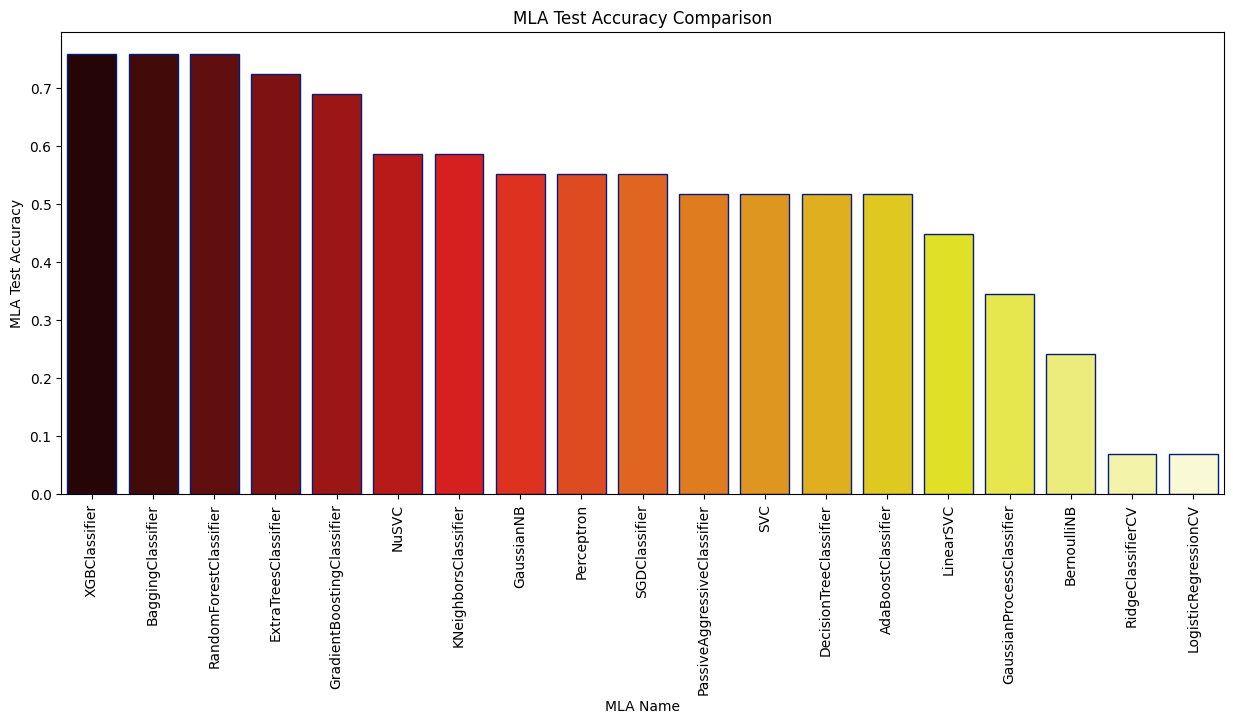

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

<Axes: xlabel='MLA Test Accuracy', ylabel='MLA Name'>

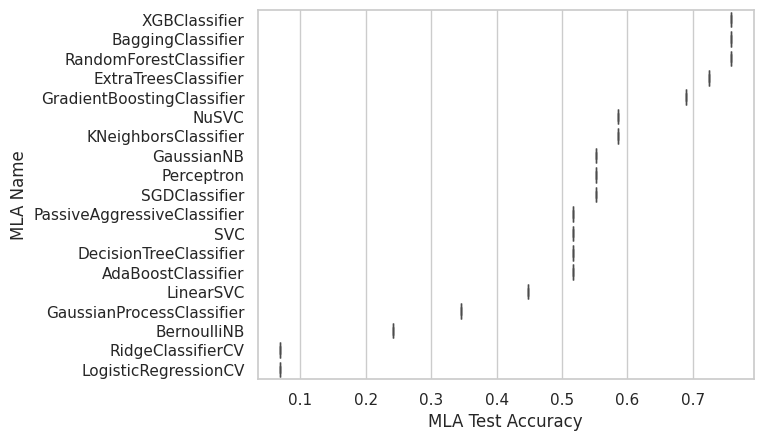

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(y="MLA Name", x="MLA Test Accuracy",data=MLA_compare)

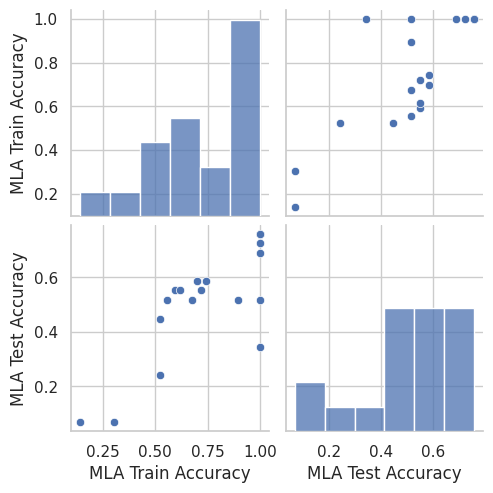

In [ ]:
sns.set(style="whitegrid")
sns.pairplot(data=MLA_compare)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

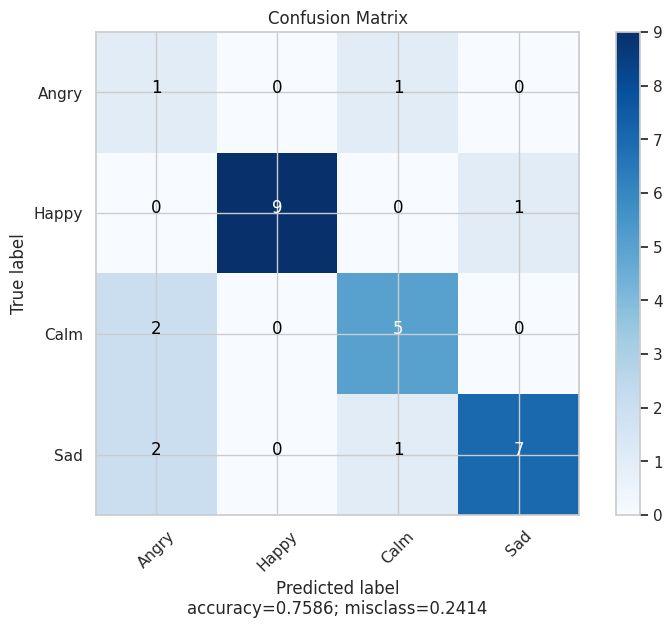

In [ ]:
#not normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = False,
                      target_names = ['Angry', 'Happy', 'Calm', 'Sad'],
                      title        = "Confusion Matrix")

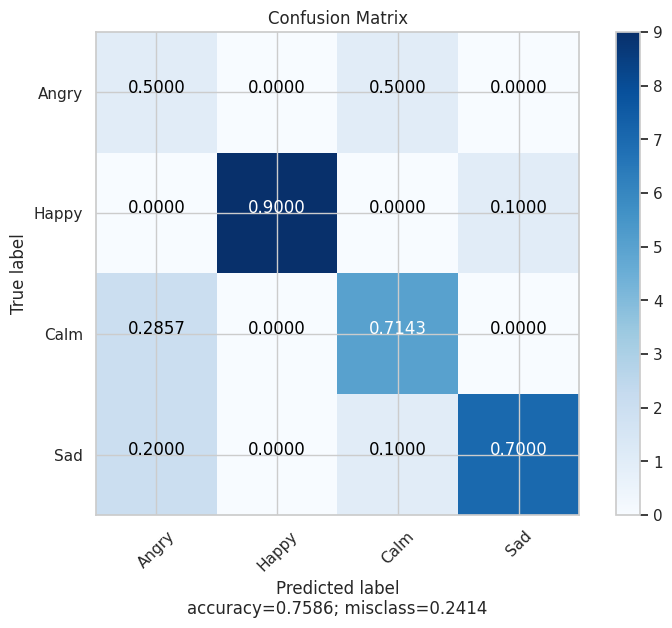

In [ ]:
#normalized
plot_confusion_matrix(cm           = confusion_matrix(y_test, predicted),
                      normalize    = True,
                      target_names = ['Angry', 'Happy', 'Calm', 'Sad'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score
from sklearn import metrics

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:


    predicted = alg.fit(x_train, y_train).predict(x_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission(Macro)'] = precision_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Precission(Micro)'] = precision_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Precission(Weighted)'] = precision_score(y_test, predicted, average="weighted")
    MLA_compare.loc[row_index, 'MLA Recall(macro)'] = recall_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'MLA Recall(micro)'] = recall_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'MLA Recall(weighted)'] = recall_score(y_test, predicted, average="weighted")
    #MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'F1 Score(Macro)'] = metrics.f1_score(y_test, predicted, average="macro")
    MLA_compare.loc[row_index, 'F1 Score(Micro)'] = metrics.f1_score(y_test, predicted, average="micro")
    MLA_compare.loc[row_index, 'F1 Score(Weighted)'] = metrics.f1_score(y_test, predicted, average="weighted")



    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission(Macro),MLA Precission(Micro),MLA Precission(Weighted),MLA Recall(macro),MLA Recall(micro),MLA Recall(weighted),F1 Score(Macro),F1 Score(Micro),F1 Score(Weighted)
18,XGBClassifier,1.0000,0.7586,0.697321,0.758621,0.832759,0.703571,0.758621,0.758621,0.681287,0.758621,0.786996
1,BaggingClassifier,1.0000,0.7586,0.771429,0.758621,0.881773,0.814286,0.758621,0.758621,0.729380,0.758621,0.787946
2,ExtraTreesClassifier,1.0000,0.6897,0.678571,0.689655,0.777340,0.653571,0.689655,0.689655,0.621429,0.689655,0.692118
3,GradientBoostingClassifier,1.0000,0.6552,0.614583,0.655172,0.783046,0.528571,0.655172,0.655172,0.536797,0.655172,0.671443
4,RandomForestClassifier,1.0000,0.6207,0.589148,0.620690,0.683554,0.603571,0.620690,0.620690,0.552795,0.620690,0.609767
15,NuSVC,0.7442,0.5862,0.722727,0.586207,0.868339,0.578571,0.586207,0.586207,0.562179,0.586207,0.646773
13,KNeighborsClassifier,0.6977,0.5862,0.629735,0.586207,0.765152,0.567857,0.586207,0.586207,0.537179,0.586207,0.622104
10,Perceptron,0.5930,0.5517,0.650641,0.551724,0.811229,0.453571,0.551724,0.551724,0.455154,0.551724,0.548222
16,LinearSVC,0.4651,0.5517,0.647222,0.551724,0.727969,0.610714,0.551724,0.551724,0.486304,0.551724,0.544588
12,GaussianNB,0.7209,0.5517,0.623016,0.551724,0.754789,0.553571,0.551724,0.551724,0.524778,0.551724,0.599783


In [ ]:
import pandas as pd
import xgboost as xgb

# Load the trained XGBoost model from file
xgb_model = xgb.XGBClassifier()  # Assuming you've created and trained the model
xgb_model.load_model('/content/model')  # Replace 'path_to_model_file.model' with the actual path to your model file

# Load the new data on which you want to make predictions
# Initialize an empty list to store feature values
feature_values = []

# List of all feature names
feature_names = [
    'EnergyDCTDelta', 'EnergyIDCTDelta', 'EnergyFFTDelta', 'EnergyIFFTDelta',
    'EnergyDWTcADelta', 'EnergyDWTcDDelta', 'EnergySTFTDelta', 'EnergyWVDDelta',
    'EnergyDCTTheta', 'EnergyIDCTTheta', 'EnergyFFTTheta', 'EnergyIFFTTheta',
    'EnergyDWTcATheta', 'EnergyDWTcDTheta', 'EnergySTFTTheta', 'EnergyWVDTheta',
    'EnergyDCTAlphaLow', 'EnergyIDCTAlphaLow', 'EnergyFFTAlphaLow', 'EnergyIFFTAlphaLow',
    'EnergyDWTcAAlphaLow', 'EnergyDWTcDAlphaLow', 'EnergySTFTAlphaLow', 'EnergyWVDAlphaLow',
    'EnergyDCTAlphaHigh', 'EnergyIDCTAlphaHigh', 'EnergyFFTAlphaHigh', 'EnergyIFFTAlphaHigh',
    'EnergyDWTcAAlphaHigh', 'EnergyDWTcDAlphaHigh', 'EnergySTFTAlphaHigh', 'EnergyWVDAlphaHigh',
    'EnergyDCTBetaLow', 'EnergyIDCTBetaLow', 'EnergyFFTBetaLow', 'EnergyIFFTBetaLow',
    'EnergyDWTcABetaLow', 'EnergyDWTcDBetaLow', 'EnergySTFTBetaLow', 'EnergyWVDBetaLow',
    'EnergyDCTBetaHigh', 'EnergyIDCTBetaHigh', 'EnergyFFTBetaHigh', 'EnergyIFFTBetaHigh',
    'EnergyDWTcABetaHigh', 'EnergyDWTcDBetaHigh', 'EnergySTFTBetaHigh', 'EnergyWVDBetaHigh',
    'EnergyDCTGammaLow', 'EnergyIDCTGammaLow', 'EnergyFFTGammaLow', 'EnergyIFFTGammaLow',
    'EnergyDWTcAGammaLow', 'EnergyDWTcDGammaLow', 'EnergySTFTGammaLow', 'EnergyWVDGammaLow',
    'EnergyDCTGammaMid', 'EnergyIDCTGammaMid', 'EnergyFFTGammaMid', 'EnergyIFFTGammaMid',
    'EnergyDWTcAGammaMid', 'EnergyDWTcDGammaMid', 'EnergySTFTGammaMid', 'EnergyWVDGammaMid',
    'MeanDelta', 'MedianDelta', 'SkewnessDelta', 'KurtosisDelta', 'StdDeviaDelta', 'RMSDelta',
    'EnergyDelta', 'MeanTheta', 'MedianTheta', 'SkewnessTheta', 'KurtosisTheta', 'StdDeviaTheta',
    'RMSTheta', 'EnergyTheta', 'MeanalphaLow', 'MedianalphaLow', 'SkewnessalphaLow', 'KurtosisalphaLow',
    'StdDeviaalphaLow', 'RMSalphaLow', 'EnergyalphaLow', 'MeanalphaHigh', 'MedianalphaHigh',
    'SkewnessalphaHigh', 'KurtosisalphaHigh', 'StdDeviaalphaHigh', 'RMSalphaHigh', 'EnergyalphaHigh',
    'MeanbetaLow', 'MedianbetaLow', 'SkewnessbetaLow', 'KurtosisbetaLow', 'StdDeviabetaLow', 'RMSbetaLow',
    'EnergybetaLow', 'MeanbetaHigh', 'MedianbetaHigh', 'SkewnessbetaHigh', 'KurtosisbetaHigh',
    'StdDeviabetaHigh', 'RMSbetaHigh', 'EnergybetaHigh', 'MeangammaLow', 'MediangammaLow',
    'SkewnessgammaLow', 'KurtosisgammaLow', 'StdDeviagammaLow', 'RMSgammaLow', 'EnergygammaLow',
    'MeangammaMid', 'MediangammaMid', 'SkewnessgammaMid', 'KurtosisgammaMid', 'StdDeviagammaMid',
    'RMSgammaMid', 'EnergygammaMid'
]

# Iterate over each feature name and prompt user input
for feature_name in feature_names:
    feature_value = input(f"Enter value for {feature_name}: ")
    feature_values.append(feature_value)

# Print the list of feature values
print(feature_values)


# Make predictions using the trained XGBoost model
predictions = xgb_model.predict(feature_values)

# Print the predictions
print(predictions)

In [ ]:
music_df = pd.read_csv('/content/data_moods.csv')

In [ ]:
music_df

In [ ]:
music_df = music_df[['name','acousticness', 'danceability', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'release_date','mood']]
music_df.head()

In [ ]:
music_df["mood"].value_counts()

In [ ]:
print(music_df['mood'].unique())

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=4,
                                   verbose=2))],verbose=True)
X = music_df.select_dtypes(np.number)
number_cols = list(X.columns)
print(number_cols)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
music_df['cluster_label'] = song_cluster_labels

In [ ]:
import joblib
# Save the model as a pickle in a file
joblib.dump(song_cluster_pipeline, 'kmeans.pkl')

In [ ]:
from sklearn.decomposition import PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = music_df['name']
projection['cluster'] = music_df['cluster_label']

In [ ]:
import plotly.express as px
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [ ]:
# Assuming mood labels are stored as numeric values in the 'mood' column
predicted_numeric_mood = 0  # Replace with your actual numeric mood value

Play = music_df[music_df['mood'] == predicted_numeric_mood]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)

# Display the result
display(Play)

In [ ]:
# Display the prediction
print("Predicted Level:", predictions)

In [ ]:
predicted_numeric_mood = predictions[0]
print("Predicted Numeric Mood:", predicted_numeric_mood)

Play = music_df[music_df['mood'] == predicted_numeric_mood]
print("Number of songs matching the predicted mood:", len(Play))

Play = music_df[music_df['mood'] == predicted_numeric_mood]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)

# Display the result
display(Play)

In [ ]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(predicted_numeric_mood):

    if(predicted_numeric_mood == 3):

        Play = music_df[music_df['mood'] == 3 ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if(predicted_numeric_mood == 2):

        Play = music_df[music_df['mood'] == 2]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if(predicted_numeric_mood == 0):

        Play = music_df[music_df['mood'] == 0]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if(predicted_numeric_mood == 1):

        Play = music_df[music_df['mood'] == 1 ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

In [ ]:
Recommend_Songs(predicted_numeric_mood)
Recommend_Songs